<a href="https://colab.research.google.com/github/Harshininew/first/blob/main/Channel_estimation_in_Cell_free_communication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/MLData.csv')
df.head()

Simulation Run Number  T-R Separation Distance (m)  Time Delay (ns)  \
0                      1                        216.4              721   
1                      1                        216.4              725   
2                      1                        216.4              729   
3                      1                        216.4              735   
4                      1                        216.4              741   

   Received Power (dBm)   Phase (rad)  Azimuth AoD (degree)  \
0                -120.8           3.2                   291   
1                -127.8           5.6                   299   
2                -119.8           1.4                   119   
3                -118.1           2.8                   290   
4                -126.1           3.1                   295   

   Elevation AoD (degree)  Azimuth AoA (degree)  Elevation AoA (degree)  \
0                    -2.1                  14.3                     -17   
1                     1.4                 176.9                      18   
2                    -4.4                 212.3                       5   
3                    -1.2                 315.4                      -8   
4                    -1.4                 207.3                      12   

   Path Loss (dB)  RMS Delay Spread (ns)  Season  Frequency  Success  
0           150.8                    3.5       0      24.25        1  
1           157.7                    1.5       0      24.25        1  
2           149.8                    0.4       0      24.25        0  
3           148.1                    0.8       0      24.25        0  
4           156.0                    5.0       0      24.25        1

In [ ]:
cdf = df[['Success','Path Loss (dB)','Simulation Run Number', 'Time Delay (ns)','Received Power (dBm)','Azimuth AoA (degree)','Elevation AoD (degree)', 'Azimuth AoA (degree)','Elevation AoA (degree)']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Success',axis=1))
scaled_features1 = df['Success']
scaled_features
type(scaled_features)

numpy.ndarray

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, scaled_features1, test_size = 0.2, random_state = 750)
x_train.shape
x_test.shape

(567, 13)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
#Predict Output
predicted_y = knn.predict(x_test) # 0:Overcast, 2:Mild
print(predicted_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
from sklearn.metrics import r2_score
print(f"R2-score:{r2_score(y_test , predicted_y)}")#most accurate thing or evaluation metrics

R2-score:0.13214285714285723


In [ ]:
from sklearn.metrics import f1_score
print(f"accuracy is {f1_score(y_test, predicted_y)}")

accuracy is 0.9946619217081851


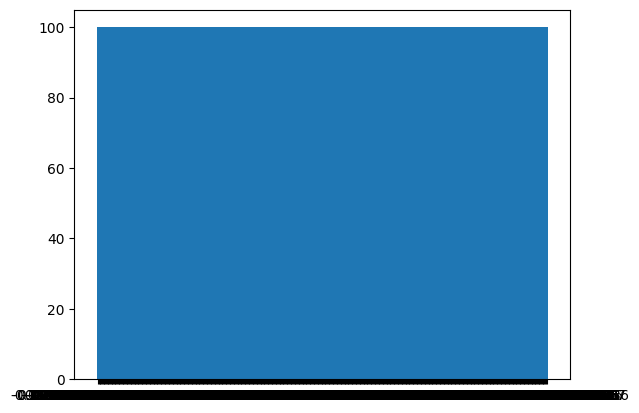

In [ ]:
import matplotlib.pyplot as plt

# Assuming x_test and predicted_y are defined

# Create an array of indices for the x-axis
x_train = range(len(x_test[:, 1]))
# Plot the bar graph
plt.bar(x_train,100,3)

# Set the tick labels for the x-axis
plt.xticks(x_train, x_test[:, 1])


# Show the plot
plt.show()





